### Importing Dependencies

In [1]:
# Import denpendencies
from pathlib import Path
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler

### Importing Data Files

In [2]:
# reading files in dataframe
# create empty dictionary to hold data
store_data = {}
# define file paths
# define file path
file_paths = {"train":"../Resources/train.csv",
              "test":"../Resources/test.csv",
            "holidays_events":"../Resources/holidays_events.csv",
            "oil":"../Resources/oil.csv",
            "stores":"../Resources/stores.csv",
            "transactions":"../Resources/transactions.csv"}
# read and store each file data in the store_data list.
for data_file,relative_path in file_paths.items():
    # create absolute path for each file
    file_path = os.path.abspath(relative_path)
    # read and store file in dictionary
    try:
        store_data[data_file] = pd.read_csv(file_path, low_memory=False)
        print(f'{data_file} loaded successfully.')
    except FileNotFoundError:
        print(f"Error: {data_file} not found.")
    except Exception as e:
        print(f"An error occured while loading data{e}")
    

train loaded successfully.
test loaded successfully.
holidays_events loaded successfully.
oil loaded successfully.
stores loaded successfully.
transactions loaded successfully.


### Data Cleaning 

In [3]:
holidays_evets = store_data["holidays_events"]
holidays_evets.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [4]:
holidays_evets['type'].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

In [5]:
# count the rows with data
print(holidays_evets.count())

date           350
type           350
locale         350
locale_name    350
description    350
transferred    350
dtype: int64


In [6]:
# Access oil data
oil = store_data["oil"]
oil.tail()

,date,dcoilwtico
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


In [7]:
# count of oil rows with data
print(oil.count())

date          1218
dcoilwtico    1175
dtype: int64


In [8]:
# since there few missing data rows and there is numerical data
# instead of deleting rows. It is assume there is no sale to save data
oil_filled = oil.fillna(0)
# get the count of filled rows
print(oil_filled.count())

date          1218
dcoilwtico    1218
dtype: int64


In [9]:
# access store data
stores = store_data["stores"]
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [10]:
# check the empty rows of data
print(stores.count())

store_nbr    54
city         54
state        54
type         54
cluster      54
dtype: int64


In [49]:
# access train data
train = store_data["train"]
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [12]:
# count data containing rows inside the data frame
print(train.count())

id             3000888
date           3000888
store_nbr      3000888
family         3000888
sales          3000888
onpromotion    3000888
dtype: int64


In [13]:
# Access transactions
transactions = store_data["transactions"]
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [14]:
# count data containing rows 
print(transactions.count())

date            83488
store_nbr       83488
transactions    83488
dtype: int64


### Summary of Data Cleaning
Overall Data is pretty much cleaned and does not contain missing values. only oil data had some missing numerical values which were filled with 0 to safe data loss.


## Exploratory Data Analysis

In [15]:
# merging number of transactions by a store per day and oil price
# This will provide information about impact of oil price increase/decrease on 
# cutomer visits in store.
trans_store_df = transactions.merge(oil,on="date",how="left")
trans_store_df.tail()

,date,store_nbr,transactions,dcoilwtico
83483,2017-08-15,50,2804,47.57
83484,2017-08-15,51,1573,47.57
83485,2017-08-15,52,2255,47.57
83486,2017-08-15,53,932,47.57
83487,2017-08-15,54,802,47.57


In [16]:
# check empty data rows
print(trans_store_df.count())

date            83488
store_nbr       83488
transactions    83488
dcoilwtico      57848
dtype: int64


In [17]:
trans_store_df.dropna()

,date,store_nbr,transactions,dcoilwtico
1,2013-01-02,1,2111,93.14
2,2013-01-02,2,2358,93.14
3,2013-01-02,3,3487,93.14
4,2013-01-02,4,1922,93.14
5,2013-01-02,5,1903,93.14
...,...,...,...,...
83483,2017-08-15,50,2804,47.57
83484,2017-08-15,51,1573,47.57
83485,2017-08-15,52,2255,47.57
83486,2017-08-15,53,932,47.57


In [18]:
holiday_oil_merge=trans_store_df.merge(holidays_evets,on="date",how="left")
holiday_oil_merge

,date,store_nbr,transactions,dcoilwtico,type,locale,locale_name,description,transferred
0,2013-01-01,25,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-02,1,2111,93.14,NaN,NaN,NaN,NaN,NaN
2,2013-01-02,2,2358,93.14,NaN,NaN,NaN,NaN,NaN
3,2013-01-02,3,3487,93.14,NaN,NaN,NaN,NaN,NaN
4,2013-01-02,4,1922,93.14,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
85002,2017-08-15,50,2804,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
85003,2017-08-15,51,1573,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
85004,2017-08-15,52,2255,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
85005,2017-08-15,53,932,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [19]:
# Filling categorical data with meaningfull data 
# When there is no holiday that means it working day "Normal day" is added
# While locale,locale_name, description and transferred with "No Vacation"
holiday_oil_merge['type'].fillna("Work Day", inplace=True)
holiday_oil_merge['locale'].fillna("undefined", inplace=True)
holiday_oil_merge['locale_name'].fillna("undefined", inplace=True)
holiday_oil_merge['description'].fillna("undefined", inplace=True)
holiday_oil_merge['transferred'].fillna("undefined", inplace=True)

In [20]:
holiday_oil_merge

,date,store_nbr,transactions,dcoilwtico,type,locale,locale_name,description,transferred
0,2013-01-01,25,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-02,1,2111,93.14,Work Day,undefined,undefined,undefined,undefined
2,2013-01-02,2,2358,93.14,Work Day,undefined,undefined,undefined,undefined
3,2013-01-02,3,3487,93.14,Work Day,undefined,undefined,undefined,undefined
4,2013-01-02,4,1922,93.14,Work Day,undefined,undefined,undefined,undefined
...,...,...,...,...,...,...,...,...,...
85002,2017-08-15,50,2804,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
85003,2017-08-15,51,1573,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
85004,2017-08-15,52,2255,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
85005,2017-08-15,53,932,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [21]:
holiday_oil_merge.dropna()

,date,store_nbr,transactions,dcoilwtico,type,locale,locale_name,description,transferred
1,2013-01-02,1,2111,93.14,Work Day,undefined,undefined,undefined,undefined
2,2013-01-02,2,2358,93.14,Work Day,undefined,undefined,undefined,undefined
3,2013-01-02,3,3487,93.14,Work Day,undefined,undefined,undefined,undefined
4,2013-01-02,4,1922,93.14,Work Day,undefined,undefined,undefined,undefined
5,2013-01-02,5,1903,93.14,Work Day,undefined,undefined,undefined,undefined
...,...,...,...,...,...,...,...,...,...
85002,2017-08-15,50,2804,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
85003,2017-08-15,51,1573,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
85004,2017-08-15,52,2255,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
85005,2017-08-15,53,932,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [22]:
data_df = train.merge(holiday_oil_merge,on=["date","store_nbr"],how="left")
data_df


,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051010,3000883,2017-08-15,9,POULTRY,438.133,0,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3051011,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3051012,3000885,2017-08-15,9,PRODUCE,2419.729,148,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3051013,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [23]:
data_clean = data_df.dropna()

In [24]:
final_df=data_clean.merge(stores,on="store_nbr",how="left")
final_df

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster
0,1782,2013-01-02,1,AUTOMOTIVE,2.000,0,2111.0,93.14,Work Day,undefined,undefined,undefined,undefined,Quito,Pichincha,D,13
1,1783,2013-01-02,1,BABY CARE,0.000,0,2111.0,93.14,Work Day,undefined,undefined,undefined,undefined,Quito,Pichincha,D,13
2,1784,2013-01-02,1,BEAUTY,2.000,0,2111.0,93.14,Work Day,undefined,undefined,undefined,undefined,Quito,Pichincha,D,13
3,1785,2013-01-02,1,BEVERAGES,1091.000,0,2111.0,93.14,Work Day,undefined,undefined,undefined,undefined,Quito,Pichincha,D,13
4,1786,2013-01-02,1,BOOKS,0.000,0,2111.0,93.14,Work Day,undefined,undefined,undefined,undefined,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933300,3000883,2017-08-15,9,POULTRY,438.133,0,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
1933301,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
1933302,3000885,2017-08-15,9,PRODUCE,2419.729,148,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
1933303,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6


In [25]:
# dropping Id column
final_df.drop("id",axis = 1, inplace=True)

In [26]:
# Chaning column names to meaningfull names
final_df = final_df.rename(columns={"family":"category",
                         "onpromotion":"on_promotion",
                         "transactions":"transactions(all_categories/day)",
                         "dcoilwtico":"oil_price",
                         "type_x":"day_type",
                         "type_y":"store_type"})

In [27]:
# Adding the 'is_long_weekend' column based on the final_df data
if 'day_type' in final_df.columns and 'transferred' in final_df.columns:
    final_df['is_long_weekend'] = ((final_df['day_type'].isin(['Holiday', 'Bridge'])) & (final_df['transferred'] == False))
else:
    print("Columns 'day_type' and/or 'transferred' do not exist in merged_df.")

final_df

,date,store_nbr,category,sales,on_promotion,transactions(all_categories/day),oil_price,day_type,locale,locale_name,description,transferred,city,state,store_type,cluster,is_long_weekend
0,2013-01-02,1,AUTOMOTIVE,2.000,0,2111.0,93.14,Work Day,undefined,undefined,undefined,undefined,Quito,Pichincha,D,13,False
1,2013-01-02,1,BABY CARE,0.000,0,2111.0,93.14,Work Day,undefined,undefined,undefined,undefined,Quito,Pichincha,D,13,False
2,2013-01-02,1,BEAUTY,2.000,0,2111.0,93.14,Work Day,undefined,undefined,undefined,undefined,Quito,Pichincha,D,13,False
3,2013-01-02,1,BEVERAGES,1091.000,0,2111.0,93.14,Work Day,undefined,undefined,undefined,undefined,Quito,Pichincha,D,13,False
4,2013-01-02,1,BOOKS,0.000,0,2111.0,93.14,Work Day,undefined,undefined,undefined,undefined,Quito,Pichincha,D,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933300,2017-08-15,9,POULTRY,438.133,0,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,True
1933301,2017-08-15,9,PREPARED FOODS,154.553,1,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,True
1933302,2017-08-15,9,PRODUCE,2419.729,148,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,True
1933303,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,True


### EDA

## ML Modelling to predict the sales

In [28]:
from sklearn.metrics import mean_squared_log_error
import numpy as np
from sklearn.linear_model import LinearRegression

In [29]:
train = store_data['train']
test = store_data["test"]

In [30]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [31]:
X_train = train.drop(columns=["sales","id"],axis=1)
y_train = train["sales"]

In [45]:
X_test

,store_nbr,family,onpromotion
date,,,
2017-08-16,1,AUTOMOTIVE,0
2017-08-16,1,BABY CARE,0
2017-08-16,1,BEAUTY,2
2017-08-16,1,BEVERAGES,20
2017-08-16,1,BOOKS,0
...,...,...,...
2017-08-31,9,POULTRY,1
2017-08-31,9,PREPARED FOODS,0
2017-08-31,9,PRODUCE,1


In [32]:
X_train=X_train.set_index("date")

In [33]:
X_train = pd.get_dummies(X_train)

In [34]:
X_test = test.drop(columns="id",axis=1)

In [35]:
X_test = X_test.set_index("date")

In [36]:
X_test_dummy = pd.get_dummies(X_test)

In [37]:
scale = StandardScaler()

In [38]:
X_scaler = scale.fit(X_train)

In [39]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test_dummy)

In [40]:
model = LinearRegression()

In [41]:
model = model.fit(X_train_scaled,y_train)

In [42]:
prediction = model.predict(X_test_scaled)

In [43]:
X_test_dummy["sale_predicted"] = prediction

In [44]:
X_test_dummy

,store_nbr,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,sale_predicted
date,,,,,,,,,,,,,,,,,,,,,
2017-08-16,1,0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-69.256627
2017-08-16,1,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-74.270924
2017-08-16,1,2,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-35.655964
2017-08-16,1,20,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2500.590084
2017-08-16,1,0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,-74.220799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,9,1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,270.526890
2017-08-31,9,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,37.076596
2017-08-31,9,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1084.393135


In [46]:
# Ensure no negative predictions (for log calculation)
X_test_dummy['sale_predicted'] = np.maximum(X_test_dummy['sale_predicted'], 0)


In [47]:
X_test_dummy

,store_nbr,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,sale_predicted
date,,,,,,,,,,,,,,,,,,,,,
2017-08-16,1,0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.000000
2017-08-16,1,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.000000
2017-08-16,1,2,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.000000
2017-08-16,1,20,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2500.590084
2017-08-16,1,0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,9,1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,270.526890
2017-08-31,9,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,37.076596
2017-08-31,9,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1084.393135


In [48]:
# Identify dummy columns
dummy_cols = [col for col in X_test_dummy.columns if col.startswith('family_')]

# Convert dummy columns back to original categorical column
X_test_dummy['family'] = X_test_dummy[dummy_cols].idxmax(axis=1).apply(lambda x: x.split('_', 1)[1])

# Drop dummy columns
df = X_test_dummy.drop(columns=dummy_cols)

            store_nbr  onpromotion  sale_predicted                      family
date                                                                          
2017-08-16          1            0        0.000000                  AUTOMOTIVE
2017-08-16          1            0        0.000000                   BABY CARE
2017-08-16          1            2        0.000000                      BEAUTY
2017-08-16          1           20     2500.590084                   BEVERAGES
2017-08-16          1            0        0.000000                       BOOKS
...               ...          ...             ...                         ...
2017-08-31          9            1      270.526890                     POULTRY
2017-08-31          9            0       37.076596              PREPARED FOODS
2017-08-31          9            1     1084.393135                     PRODUCE
2017-08-31          9            9      117.834564  SCHOOL AND OFFICE SUPPLIES
2017-08-31          9            0        0.000000  

In [50]:
# reset index
df = X_test_dummy.reset_index()

In [51]:
# adjust the columns
df[["date","store_nbr","family","onpromotion","sale_predicted"]]

,date,store_nbr,family,onpromotion,sale_predicted
0,2017-08-16,1,AUTOMOTIVE,0,0.000000
1,2017-08-16,1,BABY CARE,0,0.000000
2,2017-08-16,1,BEAUTY,2,0.000000
3,2017-08-16,1,BEVERAGES,20,2500.590084
4,2017-08-16,1,BOOKS,0,0.000000
...,...,...,...,...,...
28507,2017-08-31,9,POULTRY,1,270.526890
28508,2017-08-31,9,PREPARED FOODS,0,37.076596
28509,2017-08-31,9,PRODUCE,1,1084.393135
28510,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,117.834564


Comparison of Sales

In [53]:
import matplotlib.pyplot as plt

In [54]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

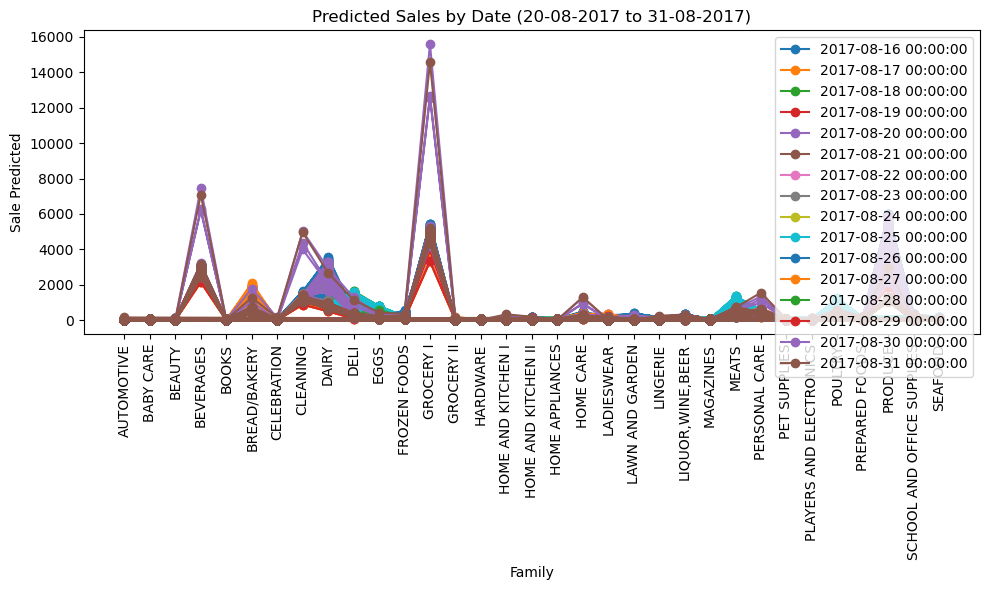

In [59]:
# Filter data for the specified date range
start_date = '2017-08-16'
end_date = '2017-08-31'
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Plotting
plt.figure(figsize=(10, 6))

# Group by 'date' and plot 'sale_predicted' for each date
for date, group in df_filtered.groupby('date'):
    plt.plot(group['family'], group['sale_predicted'], marker='o', linestyle='-', label=str(date))

# Customize plot
plt.title('Predicted Sales by Date (20-08-2017 to 31-08-2017)')
plt.xlabel('Family')
plt.ylabel('Sale Predicted')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

test data graphg before

In [61]:
# Convert 'date' column to datetime format
train['date'] = pd.to_datetime(train['date'])

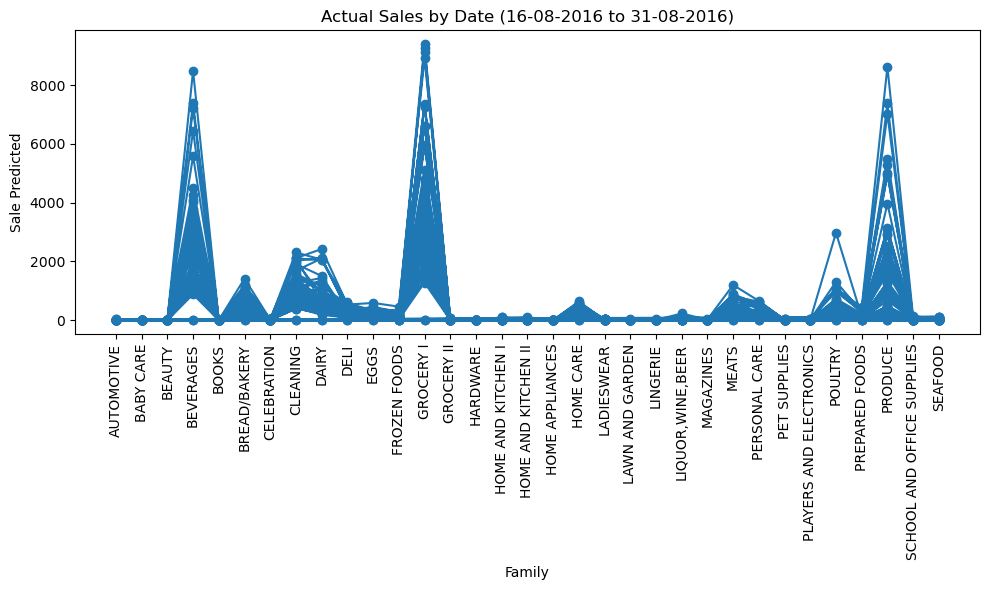

In [66]:
# Filter data for the specified date range
start_date = '2016-08-16'
end_date = '2016-08-16'
train_filtered = train[(train['date'] >= start_date) & (train['date'] <= end_date)]

# Plotting
plt.figure(figsize=(10, 6))

# Group by 'date' and plot 'sale_predicted' for each date
for date, group in train_filtered.groupby('date'):
    plt.plot(group['family'], group['sales'], marker='o', linestyle='-', label=str(date))

# Customize plot
plt.title('Actual Sales by Date (16-08-2016 to 31-08-2016)')
plt.xlabel('Family')
plt.ylabel('Sale Predicted')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()